In [142]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

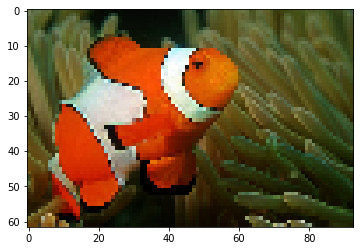

In [143]:
nemo = cv2.imread("nemo.jpg")
nemo = cv2.resize(nemo, (0, 0), fx=0.1, fy=0.1)
nemo = cv2.cvtColor(nemo,cv2.COLOR_BGR2RGB)

plt.imshow(nemo)

In [144]:
test = np.array([[1,2],
                 [3,4],
                 [5,6],
                 [7,8],
                 [9,10],
                 [11,12]])
test = test.reshape((1,12))
test

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [145]:
nemo.shape

(62, 93, 3)

In [146]:
pixle_colors = nemo.reshape((nemo.shape[0]*nemo.shape[1],3))/255.0

<function matplotlib.pyplot.show(close=None, block=None)>

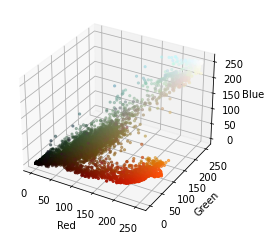

In [147]:
R , G , B = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1,1,1,projection="3d")
axis.scatter(R.flatten(),G.flatten(),B.flatten(),facecolors = pixle_colors,marker ='.')
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show

In [148]:
nemo_hsv = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

H , S , V = cv2.split(nemo_hsv)

<function matplotlib.pyplot.show(close=None, block=None)>

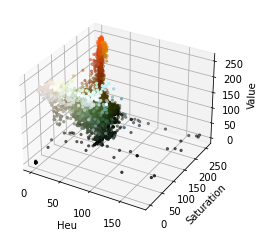

In [149]:
fig = plt.figure()
axis = fig.add_subplot(1,1,1,projection="3d")
axis.scatter(H.flatten(),S.flatten(),V.flatten(),facecolors = pixle_colors,marker ='.')
axis.set_xlabel("Heu")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show

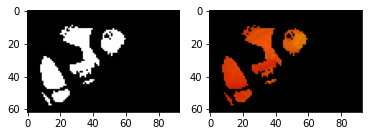

In [150]:
light_orange = (1 , 190 , 200)
dark_orange = (18 , 255 , 255)

mask_orange = cv2.inRange(nemo_hsv,light_orange,dark_orange)
result = cv2.bitwise_and(nemo, nemo , mask = mask_orange)
plt.subplot(1,2,1)
plt.imshow(mask_orange, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(result)

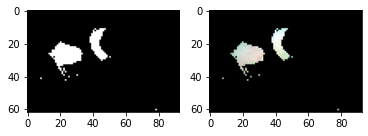

In [151]:
light_white = (0 , 0 , 200)
dark_white = (145 , 60 , 255)

mask_white = cv2.inRange(nemo_hsv,light_white,dark_white)
result = cv2.bitwise_and(nemo, nemo , mask = mask_white)
plt.subplot(1,2,1)
plt.imshow(mask_white, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(result)

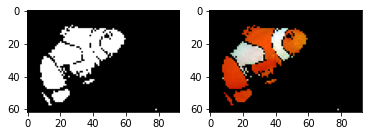

In [152]:
final_mask = mask_orange + mask_white
final_result = cv2.bitwise_and(nemo, nemo , mask = final_mask)
plt.subplot(1,2,1)
plt.imshow(final_mask, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(final_result)

In [ ]:
X_train = np.array([H.flatten() , S.flatten() , V.flatten()]).T
X_train.shape

In [ ]:
Y_train = final_mask.flatten() // 255
print(Y_train.shape)
Y_train

In [ ]:
from knn import KNearstNeighbors

In [153]:
my_knn = KNearstNeighbors(k=3)
my_knn.fit(X_train,Y_train)

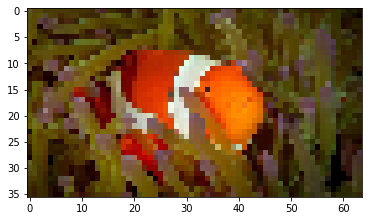

In [154]:
nemo_brother = cv2.imread("dadashe-nemo.jpg")
nemo_brother = cv2.resize(nemo_brother, (0,0) , fx= 0.1, fy=0.1)
nemo_brother = cv2.cvtColor(nemo_brother,cv2.COLOR_BGR2RGB)
plt.imshow(nemo_brother)

In [155]:
nemo_brother_hsv = cv2.cvtColor(nemo_brother, cv2.COLOR_RGB2HSV)
X_test = nemo_brother_hsv.reshape((nemo_brother_hsv.shape[0]*nemo_brother_hsv.shape[1], 3))
X_test.shape

(2304, 3)

In [156]:
answer = my_knn.predict(X_test)
answer

1

In [157]:
answer = answer.reshape((nemo_brother_hsv.shape[0], nemo_brother_hsv.shape[1]))
plt.imshow(answer, cmap='gray')
plt.show()

ValueError: cannot reshape array of size 1 into shape (36,64)